In [14]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.naive_bayes import GaussianNB


import matplotlib.pyplot as plt
from matplotlib import style
import datetime
style.use('ggplot')


In [33]:
raw_data='../data/processed/fishtow-ml.csv'
df = pd.read_csv(raw_data)


# Create a DataFrame for numerical features
data1 = pd.DataFrame(df, columns=['length','sst','bth'])
print(data1.shape)
 
# Create a DataFrame for categorical features
cols_to_transform = pd.DataFrame(df,columns=['sex'])
dummies = pd.get_dummies(cols_to_transform)


(2251, 3)


In [34]:
# Join data1 and dummies using Numpy and yield as array
X = np.array(data1)
                                 
# Specify the dependent variable as array
Y = np.array(df['label'])

print( X.shape, Y.shape )

gnb = GaussianNB()

y_pred = gnb.fit( X, Y ).predict( X )

print( y_pred.shape )

print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))






# lm = LinearRegression(n_jobs=-1)

# #To check the accuracy/confidence level of the prediction,
# #we have 25% test datasets, while 75% is used for training.

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

((2251, 3), (2251,))
(2251,)
Number of mislabeled points out of a total 2251 points : 201


In [11]:
# First we fit a model
model=lm.fit(X_train,y_train)
#print the coefficents
print("The linear cofficients", model.coef_)
# Try to predict the y ( NPP_Predict) for the test data-features(independent variables(X_test)
predictions=lm.predict(X_test)
# Accuracy of the prediction
confidence = lm.score(X_test, y_test)
print("This is predicted NPP2001 Values ", predictions)
print("This is the prediction accuracy ", confidence)


('The linear cofficients', array([ 0.00756155, -0.02226366,  0.01141143,  0.        , -0.06390983,
        0.06390983]))
('This is predicted NPP2001 Values ', array([ 1.64895635e-01,  2.61367025e-01,  5.83860668e-02,  3.80651446e-01,
        1.51020147e-01,  3.74063578e-01,  4.71138432e-01,  3.70282803e-01,
        1.39985490e-01,  5.29075364e-01,  2.34332245e-01,  2.62869996e-01,
        3.28316312e-01,  3.82351834e-01,  4.11832541e-01,  3.05648770e-01,
        2.96535009e-01,  2.72709351e-01,  4.91068111e-01,  2.26770694e-01,
        2.56290191e-01,  5.08946885e-01,  3.23928394e-01,  4.38336757e-01,
        3.87234671e-01,  5.30873605e-01,  1.86694477e-01,  3.40858636e-01,
        4.19334682e-01,  1.79132926e-01, -9.36305492e-02,  3.21859429e-01,
        2.83347282e-01, -9.38390489e-02,  3.36217036e-01,  1.94256027e-01,
        1.35936396e-01,  6.67012742e-01,  1.11314621e-02,  4.29074820e-01,
        1.15057796e-01,  2.67497476e-01,  4.76430441e-01,  2.37977979e-01,
        3.570502

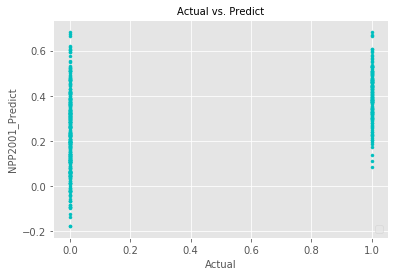

In [12]:

plt.legend(loc=4)
plt.title("Actual vs. Predict", size=10)
plt.scatter(y_test,predictions,color='c', marker='.')
plt.xlabel("Actual", size=10)
plt.ylabel("Predict", size=10)
plt.show()


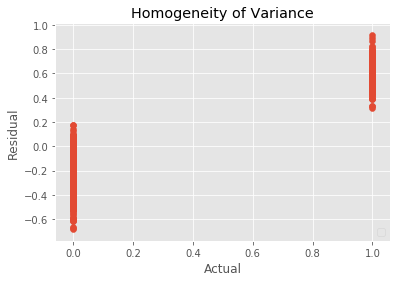

In [13]:
plt.legend(loc=4)
plt.title("Homogeneity of Variance")
plt.scatter(y_test,y_test-predictions)
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.show()
 

In [ ]:
#Perform 10 fold Cross Validation (KFold)
scores=cross_val_score(model,X,y,cv=10)
print ("Cross Validated Scores",scores)
kf=KFold(n_splits=10, random_state=None,shuffle=True)
for train_index, test_index in kf.split(X):
print (“TRAIN”, train_index, “TEST”, test_index)
 X_train,X_test=X[train_index], X[test_index]
 y_train,y_test=y[train_index],y[test_index]
 # Make Cross Validated predictions
 predictions2=cross_val_predict(model,X,y,cv=10)
 #Check the R2- the proportion of variance in the dependent variable explained by the predictors
 accuracy=metrics.r2_score(y,predictions2)
 print (“This is R2”,accuracy)
 plt.scatter(y,predictions2,color=’c’, marker=’.’)
 plt.legend(loc=4)
 plt.xlabel(“Actual NPP2001”, size=10)
 plt.ylabel(“NPP2001_Predict”, size=10)
 plt.title(“Actual and Predicted NPP2001 Values using 10 Fold Cross Validation”,size=10)
 plt.show()